In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/usa-real-estate-dataset/realtor-data.csv


**DATA UNDERSTANDING**

In [2]:
df = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.csv')
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [3]:
df.shape

(100000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [5]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,75050.000000,75112.000000,85987.000000,99805.000000,7.508200e+04,1.000000e+05
mean,3.701013,2.494595,13.613473,2132.003467,2.180082e+03,4.383656e+05
std,2.091372,1.573324,840.143878,2455.654774,5.625349e+03,1.015773e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,4.450000e+02
25%,3.000000,2.000000,0.190000,971.000000,1.200000e+03,1.250000e+05
50%,3.000000,2.000000,0.510000,1225.000000,1.728000e+03,2.650000e+05
75%,4.000000,3.000000,2.000000,1611.000000,2.582000e+03,4.749000e+05
max,86.000000,56.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [6]:
df.describe(include = 'object')

,status,city,state,prev_sold_date
count,100000,99948,100000,28745
unique,2,525,12,3604
top,for_sale,San Juan,Massachusetts,2019-10-01
freq,99819,4788,52694,83


**DATA PREPROCESSING**

In [7]:
df.duplicated().sum()

85364

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


status             0.000000
bed               22.875102
bath              22.868270
acre_lot          12.599071
city               0.109319
state              0.000000
zip_code           0.191309
house_size        22.861438
prev_sold_date    63.815250
price              0.000000
dtype: float64

In [10]:
# Mode imputation to handle missing value
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [11]:
df = df.dropna(subset=['zip_code','city'])
df = df.drop('prev_sold_date', axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14607 entries, 0 to 97288
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      14607 non-null  object 
 1   bed         14607 non-null  float64
 2   bath        14607 non-null  float64
 3   acre_lot    14607 non-null  float64
 4   city        14607 non-null  object 
 5   state       14607 non-null  object 
 6   zip_code    14607 non-null  float64
 7   house_size  14607 non-null  float64
 8   price       14607 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [13]:
df.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

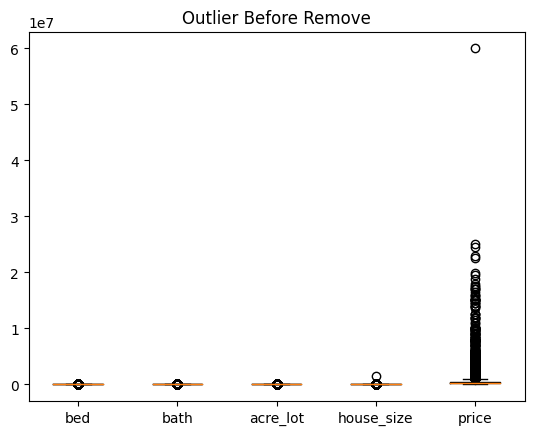

Total Row With Outlier: 14607


In [14]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier Before Remove')
plt.show()
print(f'Total Row With Outlier: {df.shape[0]}')

In [15]:
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

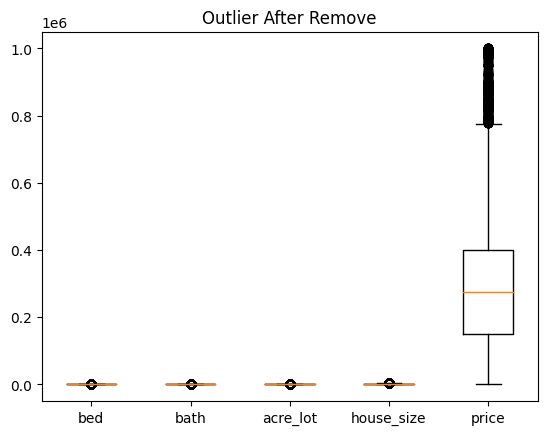

Total Row Without Outlier: 10142


In [16]:
column_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(df[column_num])
plt.xticks([1, 2, 3, 4, 5], column_num)
plt.title('Outlier After Remove')
plt.show()
print(f'Total Row Without Outlier: {df.shape[0]}')

In [17]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,10142.000000,10142.000000,10142.000000,10142.000000,10142.000000,10142.000000
mean,3.109051,2.112897,0.604981,3367.459180,1597.266811,307003.863045
std,0.718787,0.734417,0.726960,3060.098418,651.908996,204634.304753
min,2.000000,1.000000,0.000000,601.000000,181.000000,445.000000
25%,3.000000,2.000000,0.110000,1033.000000,1200.000000,149900.000000
50%,3.000000,2.000000,0.280000,2828.500000,1346.000000,274900.000000
75%,3.000000,2.000000,0.800000,6059.500000,1922.000000,400000.000000
max,5.000000,4.000000,3.500000,99999.000000,4026.000000,1000000.000000


**EXPLORATORY DATA ANALYSIS**

/tmp/ipykernel_20/488824891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<function matplotlib.pyplot.show(close=None, block=None)>

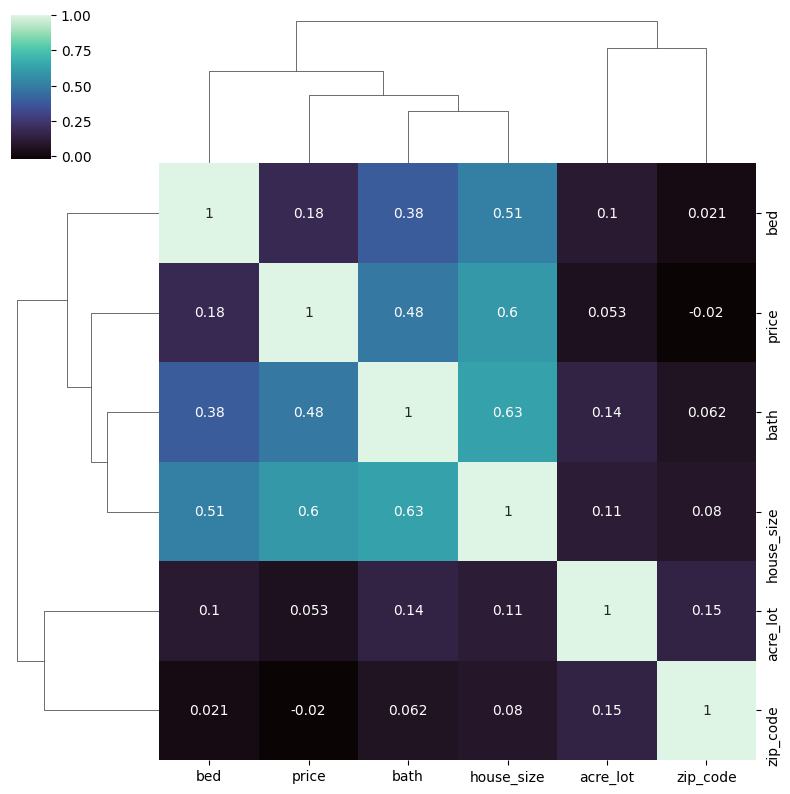

In [18]:
sns.clustermap(
    df.corr(),
    annot=True,
    cmap='mako',
    figsize=(8, 8)
)
plt.show

**DISTRIBUTION BY BED**

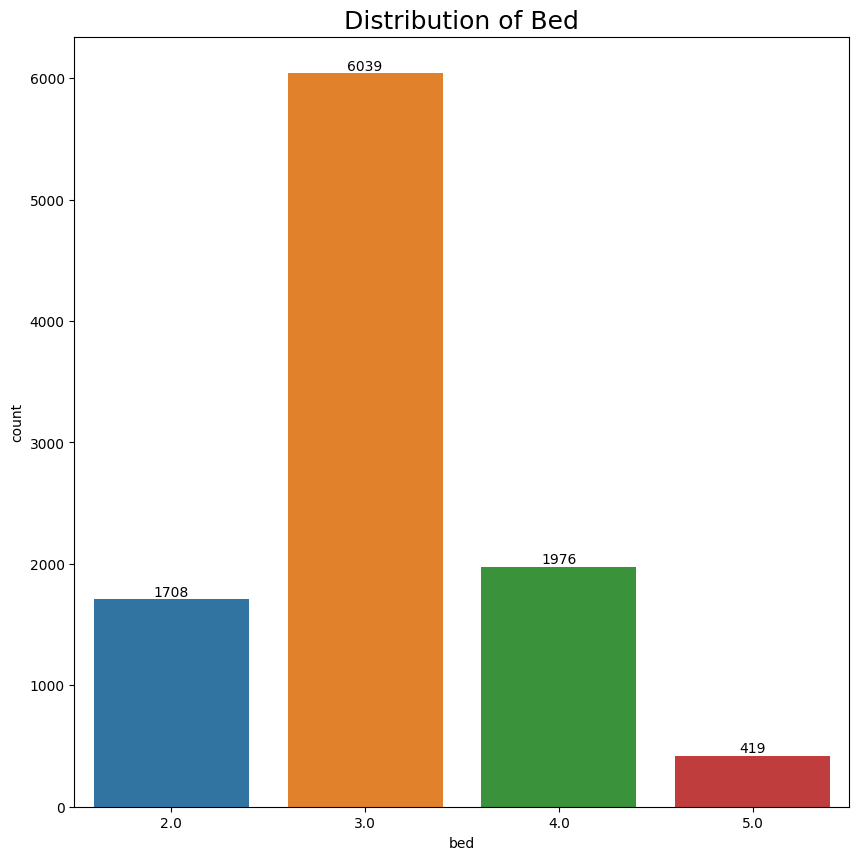

In [19]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='bed')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bed', fontsize=18)
plt.show()

**DISTRIBUTION BY BATH**

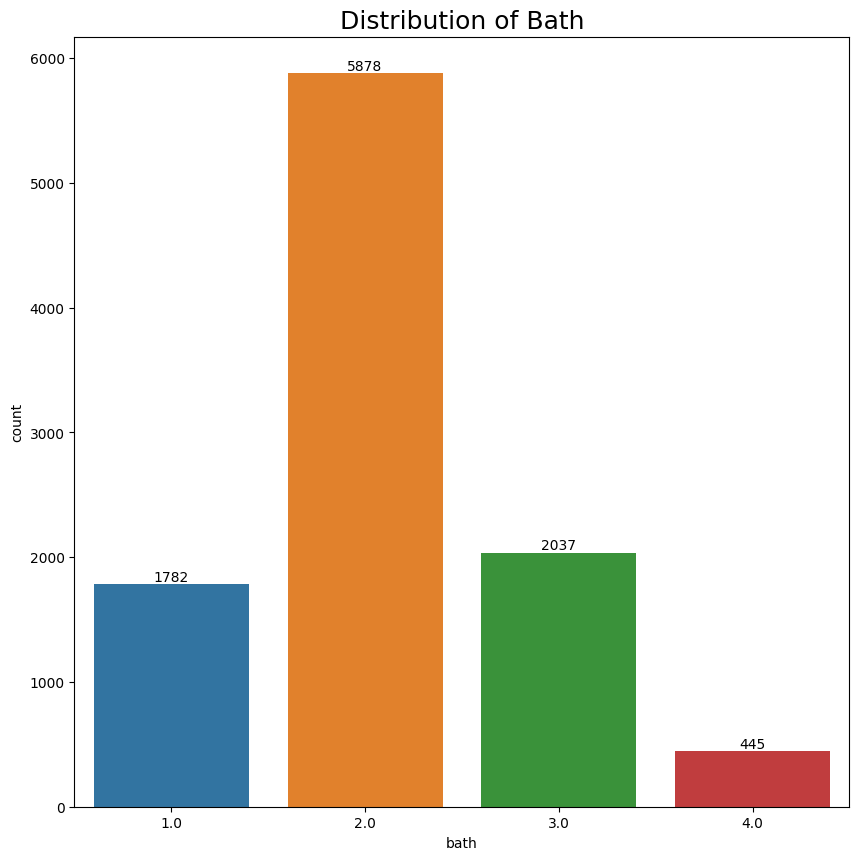

In [20]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df, x='bath')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Bath', fontsize=18)
plt.show()

**DISTRIBUTION OF BED AND BATH**

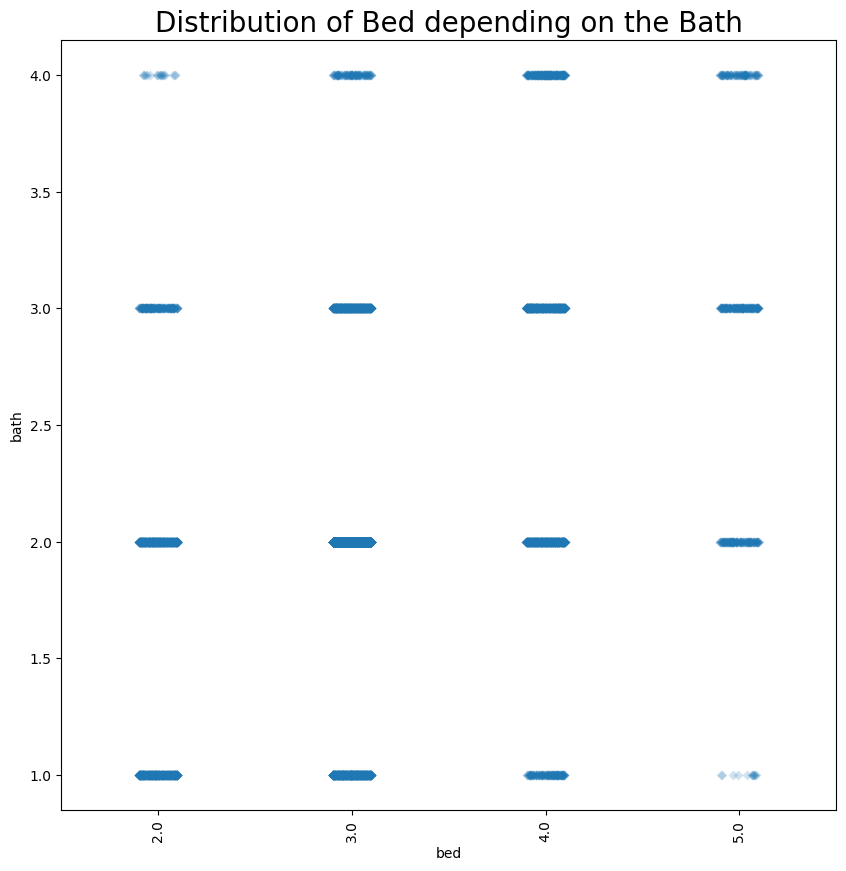

In [21]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='bath', x='bed', data=df, marker='D', alpha=0.2)
plt.title('Distribution of Bed depending on the Bath',fontsize = 20)
plt.show()

In [22]:
df.groupby('bed', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,bed,bath
3,5.0,2.806683
2,4.0,2.537449
1,3.0,2.030469
0,2.0,1.742974


/tmp/ipykernel_20/4155772061.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = grouped.pivot('bed', 'bath', 'count')


<AxesSubplot: xlabel='bath', ylabel='bed'>

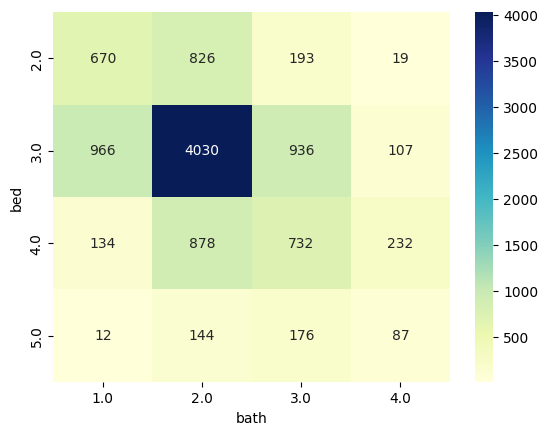

In [23]:
grouped = df.groupby(['bed', 'bath']).size().reset_index(name='count')

pivot = grouped.pivot('bed', 'bath', 'count')

sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='g')

**DISTRIBUTION OF ACRE LOT**

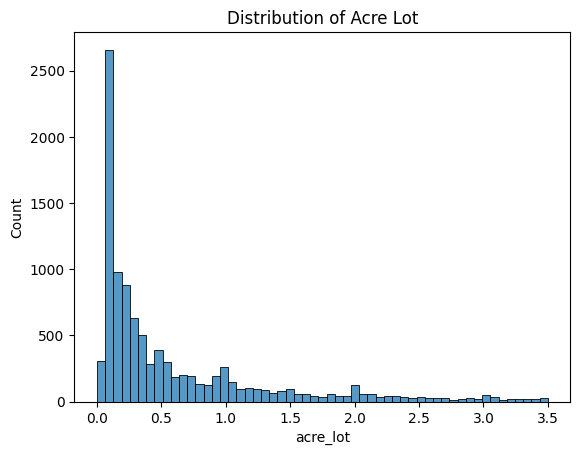

In [24]:
sns.histplot(data=df, x="acre_lot")
plt.title('Distribution of Acre Lot')
plt.show()

In [25]:
df['acre_lot'].value_counts()

0.11    1786
0.23     222
0.09     209
0.08     180
0.07     173
        ... 
3.14       1
2.37       1
3.42       1
3.18       1
3.28       1
Name: acre_lot, Length: 345, dtype: int64

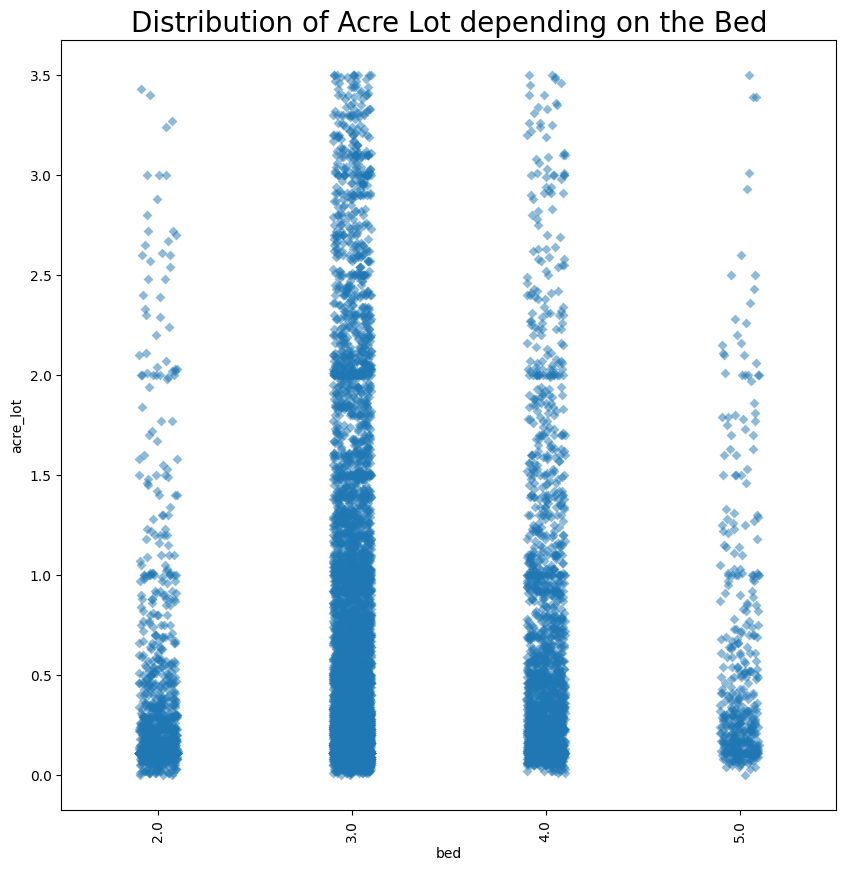

In [26]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot', x='bed', data=df, marker='D', alpha=0.5)
plt.title('Distribution of Acre Lot depending on the Bed',fontsize = 20)
plt.show()

In [27]:
df.groupby('bed', as_index=False).agg({'acre_lot' : 'count'}).sort_values('bed', ascending=False)

,bed,acre_lot
3,5.0,419
2,4.0,1976
1,3.0,6039
0,2.0,1708


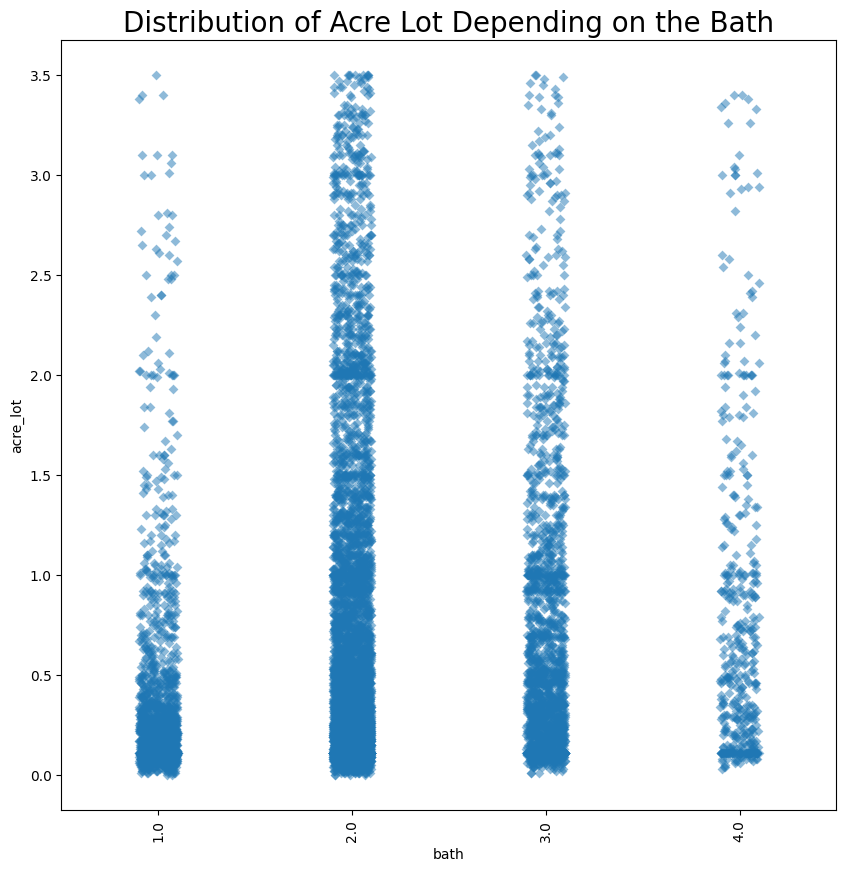

In [28]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='acre_lot', x='bath', data=df, marker='D', alpha=0.5)
plt.title('Distribution of Acre Lot Depending on the Bath',fontsize = 20)
plt.show()

In [29]:
df.groupby('bath', as_index=False).agg({'acre_lot' : 'count'}).sort_values('bath', ascending=False)

,bath,acre_lot
3,4.0,445
2,3.0,2037
1,2.0,5878
0,1.0,1782


**DISTRIBUTION OF THE CITY**

In [30]:
City = df['city'].value_counts().reset_index().rename(columns={'index': 'city', 'city': 'count'})
top_5 = City[:5]
fig = px.bar(top_5,'city', y='count', color='city', template='plotly')
fig.update_layout(title='Distribution of Top 5 Cities with Most Houses')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [31]:
top10 = df.groupby('city')['bed'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bed',color='bed', template='plotly', 
             title='Top 10 Cities with the Most Total Beds')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [32]:
top10 = df.groupby('city')['bath'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='bath',color='bath', template='plotly', 
             title='Top 10 Cities with the Most Total Bath')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [33]:
df_mean = df.groupby('city')[['bed', 'bath']].mean().reset_index()

df_mean_sort = df_mean.sort_values(by=['bed', 'bath'], ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y=['bed', 'bath'], barmode='group',
             color_discrete_sequence=['blue', 'orange'],
             labels={'value': 'Mean Bed and Bath'},
             title='Top 10 Cities with Highest Mean Bed and Bath')
fig.show()

In [34]:
top10 = df.groupby('city')['acre_lot'].sum().nlargest(10).reset_index()

fig = px.bar(top10, x='city', y='acre_lot',color='city', template='plotly',
             title='Top 10 Cities with Highest Most Acre Lot') 
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()


In [35]:
df_mean = df.groupby('city')['acre_lot'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='acre_lot', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='acre_lot', color='acre_lot', template='plotly',
             title='Top 10 Cities with Highest Mean Acre Lot')
fig.update_layout(xaxis_title='City', yaxis_title='Mean Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

**DISTRIBUTION OF THE STATE**

In [36]:
fig = px.histogram(df, x='state', nbins=25, color='state', template='plotly')
fig.update_layout(title='Distribution of State')
fig.show()

In [37]:
city_bed_count = df.groupby(['state', 'bed']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bed', barmode='stack',
             title='Distribution of State with Bed')
fig.show()

In [38]:
df.groupby('state', as_index=False).agg({'bed' : 'mean'}).sort_values('bed', ascending=False)

,state,bed
5,Puerto Rico,3.150520
0,Connecticut,3.147343
4,New York,3.103125
9,Vermont,3.099291
6,Rhode Island,3.090072
1,Massachusetts,3.083498
2,New Hampshire,3.012531
10,Virgin Islands,3.007921
3,New Jersey,3.000000
7,South Carolina,3.000000


In [39]:
city_bed_count = df.groupby(['state', 'bath']).size().reset_index(name='count')

fig = px.bar(city_bed_count, x='state', y='count', color='bath', barmode='stack',
             title='Distribution of State with Bath')
fig.show()

In [40]:
df.groupby('state', as_index=False).agg({'bath' : 'mean'}).sort_values('bath', ascending=False)

,state,bath
3,New Jersey,3.000000
0,Connecticut,2.234990
2,New Hampshire,2.195489
1,Massachusetts,2.134943
10,Virgin Islands,2.065347
9,Vermont,2.063830
4,New York,2.034375
6,Rhode Island,2.017751
7,South Carolina,2.000000
8,Tennessee,2.000000


In [41]:
df.groupby('state', as_index=False).agg({'acre_lot' : 'mean'}).sort_values('acre_lot', ascending=False)

,state,acre_lot
4,New York,1.159781
9,Vermont,0.970851
8,Tennessee,0.920000
2,New Hampshire,0.870652
10,Virgin Islands,0.792634
1,Massachusetts,0.713926
0,Connecticut,0.696629
6,Rhode Island,0.341966
5,Puerto Rico,0.293251
7,South Carolina,0.110000


**DISTRIBUTION OF HOUSE SIZE**

In [42]:
fig = px.histogram(df, x='house_size', nbins=20)
fig.update_layout(title='Distribution of House Size')
fig.show()

In [43]:
df['house_size'].value_counts()

1200.0    2010
1500.0      67
1000.0      59
2000.0      55
960.0       54
          ... 
831.0        1
727.0        1
2343.0       1
678.0        1
1727.0       1
Name: house_size, Length: 2304, dtype: int64

In [44]:
fig = px.histogram(df, x='house_size', color='bed', nbins=25, marginal='box', 
                   labels={'house_size':'House Size (sqft)'}, 
                   title='Distribution of House Size with Bed')

fig.show()

In [45]:
df.groupby('bed', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bed,house_size
3,5.0,2481.630072
2,4.0,2152.895243
1,3.0,1450.974168
0,2.0,1254.755855


In [46]:
fig = px.histogram(df, x="house_size", color="bath", nbins=25, marginal="box")
fig.update_layout(title="Distribution of House Size with Bath", xaxis_title="House Size", yaxis_title="Count")
fig.show()

In [47]:
df.groupby('bath', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,bath,house_size
3,4.0,2692.761798
2,3.0,2179.508591
1,2.0,1463.076216
0,1.0,1100.774411


In [48]:
fig = px.scatter(df, x='bed', y='bath', size='house_size', color='bed', opacity=1,
                 marginal_x='histogram', marginal_y='histogram', 
                 labels={'bed': 'Bedrooms', 'bath': 'Bathrooms', 'house_size': 'House Size'},
                 title='Distribution of House Size by Bedrooms and Bathrooms')
fig.show()

In [49]:
fig = px.histogram(df, x='acre_lot', y='house_size', color='bed',
                   marginal='box', nbins=20, opacity=0.7,
                   title='Distribution of House Size by Acre Lot and Bed')
fig.update_layout(xaxis_title='Acre Lot',
                  yaxis_title='House Size (sqft)',
                  legend_title='Bed')
fig.show()

In [50]:
fig = px.histogram(df, x='acre_lot', y='house_size', color='bath',
                   marginal='box', nbins=20, opacity=0.7,
                   title='Distribution of House Size by Acre Lot and Bath')
fig.update_layout(xaxis_title='Acre Lot',
                  yaxis_title='House Size (sqft)',
                  legend_title='Bath')
fig.show()

In [51]:
df_mean = df.groupby('acre_lot')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='acre_lot', y='house_size', title='Average House Size by Acre Lot',trendline='ols')
fig.show()

In [52]:
df_mean = df.groupby('city')['house_size'].mean().reset_index()
df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='house_size', color='house_size',
             color_continuous_scale='RdYlBu_r')
fig.update_layout(title='Top 10 Cities with Highest Mean House Size',
                  xaxis_title='City', yaxis_title='Mean House Size')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()




In [53]:
df.groupby('city', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,city,house_size
94,Colrain,3645.000000
357,Royalston,3200.000000
119,Dunstable,2958.333333
110,Deerfield,2738.000000
345,Putney,2712.000000
...,...,...
30,Barranquitas,947.000000
406,Storrs,915.500000
248,Maricao,915.000000
310,Oakham,864.000000


In [54]:
df_mean = df.groupby('state')['house_size'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='house_size', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='house_size', color='state')
fig.update_layout(title='Top 10 States with Highest Average House Size',
                  xaxis_title='State',
                  yaxis_title='Average House Size (sqft)')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [55]:
df.groupby('state', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,state,house_size
2,New Hampshire,1748.117794
1,Massachusetts,1677.569450
0,Connecticut,1671.719117
4,New York,1633.225000
6,Rhode Island,1607.785667
9,Vermont,1569.815603
3,New Jersey,1500.000000
5,Puerto Rico,1419.645868
10,Virgin Islands,1247.346535
7,South Carolina,1200.000000


**DISTRIBUTION OF PRICE**

In [56]:
fig = px.histogram(df, x="price", nbins=25, template="plotly")
fig.update_layout(title="Distribution of Price")
fig.show()

In [57]:
df['price'].value_counts()

299900.0    140
249900.0    115
349900.0    115
399900.0    106
225000.0    105
           ... 
653900.0      1
793756.0      1
264800.0      1
474000.0      1
369999.0      1
Name: price, Length: 1419, dtype: int64

In [58]:
fig = px.histogram(df, x="price", color="bed", nbins=20)
fig.update_layout(title="Distribution of Price by Bed", xaxis_title="Price", yaxis_title="Count")
fig.show()

In [59]:
df.groupby('bed', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bed,price
2,4.0,407631.412955
3,5.0,390029.861575
0,2.0,305068.689110
1,3.0,268864.658718


In [60]:
fig = px.histogram(df, x="price", color="bath", nbins=20)
fig.update_layout(title="Distribution of Price by Bath", xaxis_title="Price", yaxis_title="Count")
fig.show()

In [61]:
df.groupby('bath', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,bath,price
3,4.0,562711.894382
2,3.0,473526.656848
1,2.0,258453.497278
0,1.0,212942.159933


In [62]:
df_mean = df.groupby('acre_lot')['price'].mean().reset_index()

# plot mean price per acre lot
fig = px.scatter(df_mean, x='acre_lot', y='price', trendline='ols')
fig.update_layout(title='Average Price per Acre Lot', xaxis_title='Acre Lot', yaxis_title='Price')
fig.show()

In [63]:
df_mean = df.groupby('city')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

top10 = df_mean_sort.head(10)

fig = px.bar(top10, x='city', y='price', color='city',
             labels={'city': 'City', 'price': 'Mean Price'},
             title='Top 10 Cities with the Highest Average Price')
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [64]:
df.groupby('city', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,city,price
451,Wellesley,926666.666667
230,Lexington,896633.333333
49,Boxborough,876568.850000
97,Concord,847966.666667
16,Arlington,834450.000000
...,...,...
208,Jefferson City,34900.000000
324,Peru,29900.000000
356,Rowe,28000.000000
255,McCormick,18950.000000


In [65]:
df_mean = df.groupby('state')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='price',
             title='Top 10 States with Highest Mean Price',
             labels={'state': 'State', 'price': 'Mean Price'})
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [66]:
df.groupby('state', as_index=False).agg({'price' : 'mean'}).sort_values('price', ascending=False)

,state,price
2,New Hampshire,379524.333333
6,Rhode Island,375828.058514
1,Massachusetts,372121.633953
3,New Jersey,333490.000000
0,Connecticut,291685.279158
4,New York,236760.493750
10,Virgin Islands,229989.077228
9,Vermont,216599.985816
5,Puerto Rico,209087.249589
11,Virginia,75000.000000


In [67]:
df_mean = df.groupby('price')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='price', y='house_size', trendline='ols', 
                 labels={'price':'Price', 'house_size':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Price')
fig.show()

In [68]:
fig = px.scatter(df, x='house_size', y='price', color='bed', size='bath',trendline='ols')
fig.update_layout(title='House Size vs Price',
                  xaxis_title='House Size',
                  yaxis_title='Price')
fig.show()


**MODEL PREDICTING PRICE HOUSE**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [70]:
df['house_size'] = StandardScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))
df['price'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))

In [71]:
df['bed'] = MinMaxScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = MinMaxScaler().fit_transform(df['bath'].values.reshape(len(df), 1))
df['acre_lot'] = MinMaxScaler().fit_transform(df['acre_lot'].values.reshape(len(df), 1))

In [72]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,0.333333,0.333333,0.034286,Adjuntas,Puerto Rico,601.0,-1.038949,-0.987194
1,for_sale,0.666667,0.333333,0.022857,Adjuntas,Puerto Rico,601.0,-0.107792,-1.109369
2,for_sale,0.000000,0.000000,0.042857,Juana Diaz,Puerto Rico,795.0,-1.302803,-1.172901
3,for_sale,0.666667,0.333333,0.028571,Ponce,Puerto Rico,731.0,0.310999,-0.791714
5,for_sale,0.666667,0.666667,0.131429,San Sebastian,Puerto Rico,612.0,1.415502,-0.625556


In [73]:
X = df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city', 'state']]
y = df['price']

# one-hot encode the categorical features
X = pd.get_dummies(X, columns=['city', 'state'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
#create the decision tree model
model_DT = DecisionTreeRegressor(max_depth=5)

# fit the model to the training data
model_DT.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model_DT.predict(X_test)

# calculate
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = mean_squared_error(y_test, y_pred, squared=False)
mae_DT = mean_absolute_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

In [75]:
# buat model Random Forest dan latih menggunakan data training
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# lakukan prediksi menggunakan data testing
y_pred = model_RF.predict(X_test)

# hitung nilai rata-rata error menggunakan metrik MSE
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

In [76]:
# Buat model Gradient Boosting dan lakukan training pada data training
model_GD = GradientBoostingRegressor(learning_rate=0.05,
    n_estimators=150,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=1)
model_GD.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model_GD.predict(X_test)

# Evaluasi performa model
mse_GD = mean_squared_error(y_test, y_pred)
rmse_GD = mean_squared_error(y_test, y_pred, squared=False)
mae_GD = mean_absolute_error(y_test, y_pred)
r2_GD = r2_score(y_test, y_pred)

In [77]:
ridge_cv_model = RidgeCV(alphas=(1.38), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

y_pred = ridge_cv_model.predict(X_test)

mse_R = mean_squared_error(y_test, y_pred)
rmse_R = mean_squared_error(y_test, y_pred, squared=False)
mae_R = mean_absolute_error(y_test, y_pred)
r2_R = r2_score(y_test, y_pred)

In [78]:
elastic_model = ElasticNetCV(l1_ratio=[0.01], tol=0.01)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

mse_E = mean_squared_error(y_test, y_pred)
rmse_E = mean_squared_error(y_test, y_pred, squared=False)
mae_E = mean_absolute_error(y_test, y_pred)
r2_E = r2_score(y_test, y_pred)

In [79]:
results = {
    'Decision Tree': {'MSE': mse_DT, 'RMSE': rmse_DT, 'MAE': mae_DT, 'R^2': r2_DT},
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF},
    'Gradient Boosting': {'MSE': mse_GD, 'RMSE': rmse_GD, 'MAE': mae_GD, 'R^2': r2_GD},
    'Ridge CV': {'MSE': mse_R, 'RMSE': rmse_R, 'MAE': mae_R, 'R^2': r2_R},
    'ElasticNet CV': {'MSE': mse_E, 'RMSE': rmse_E, 'MAE': mae_E, 'R^2': r2_E}
}

# konversi dictionary ke dalam dataframe
data = pd.DataFrame.from_dict(results, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')
# tampilkan dataframe
print(data)

                    MSE  RMSE   MAE   R^2
Decision Tree      0.44  0.66  0.49  0.55
Random Forest      0.27  0.52  0.34  0.72
Gradient Boosting  0.35  0.59  0.42  0.64
Ridge CV           0.37  0.61  0.45  0.62
ElasticNet CV      0.89  0.94  0.74  0.08
